# Эмбеддинги

Мы рассмотрели такие варианты векторизации слов и текстов, как bag of words и TF-IDF.

Оба эти варианта обладают, как мы отметили ранее, недостатком крайне высокой размерности получаемых векторных представлений.

Учитывая, что векторы эти получаются разреженными, есть мотивация полагать, что размерность эту можно снизить без существенных потерь информации. Для этого можно воспользоваться как стандартными методами unsupervised ML, примененными к специальным образом представленным векторным представлениям, так и воспользоваться иным подходом.

Векторы, представляющие из себя представления неких сложных объектов в многомерном векторном пространстве, называются **эмбеддингами** (обычно, если они были получены в процессе обучения)

# You shall know the word by the company it keeps

Это известное выссказывание J.R.Firth (1957) иллюстрирует лингвистическую идею о связи семантики слова с семантикой слов, часто фигурирующих в контексте этого слова.

Если текст представлен в виде $w_1 ... w_j ... w_N$, то контекстом слова $w_j$ мы будем называть набор слов $w_{j-k} ... w_{j-1}w_{j+1} ... w_{j+k}$, где k- произвольный параметр, определяющий размер окна контекста.

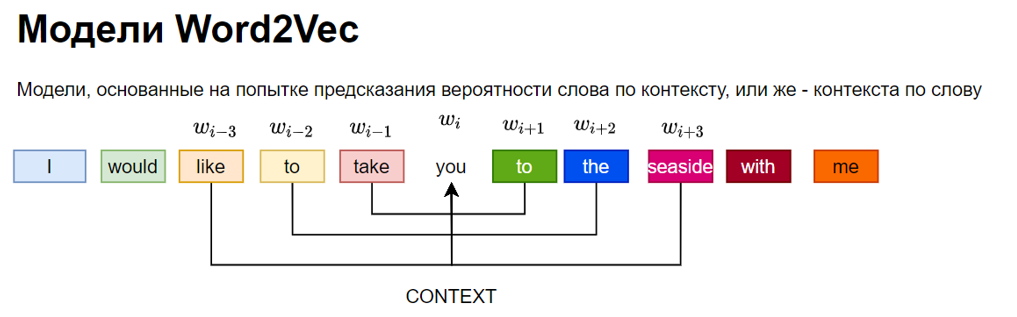

На основе такого подхода к восприятию текста довольно естественным образом рождаются две смежные задачи:

1) Задача предсказания слова по своему контексту

2) Задача моделирования контекста по его слову

Рассмотрим внимательно обе эти задачи

# Модель CBOW

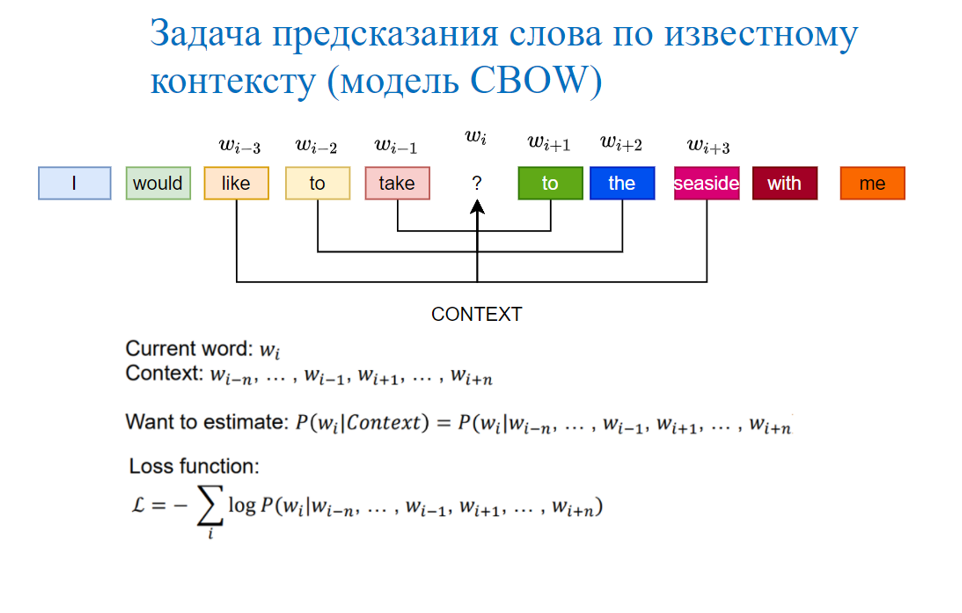

В рамках этой задачи требуется научиться предсказывать слово по его контексту. Иными словами, мы хотим получить распределение наших оценок по всем словам в словаре при условии известного контекста.

Пусть имеется текст $w_1 ... w_n$ и некоторый оценщик вероятности возникновения слова при условии контекста $P(w|context)$. Тогда наша задача - максимизировать правдоподобие наблюдаемой последовательности: $$P(w_1|context_1)*...*P(w_n|context_n) → \max\limits_{P}$$
Что равносильно $$-∑\limits_{i}P(w_i|context_i) → \min\limits_{P}$$
Именно эту функцию можно использовать в качестве лосс-функции.

# Skip-Gram model

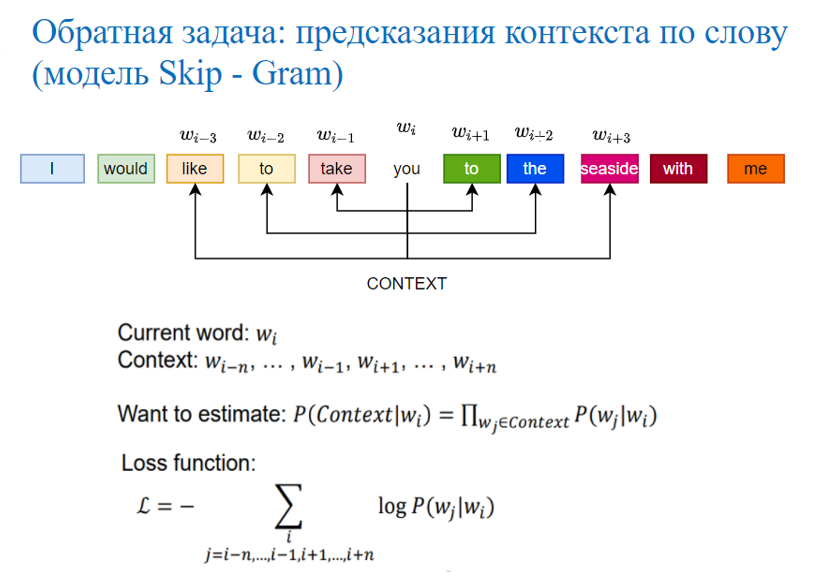

Задача обратная предыдущей: требуется предсказать контекст по предложенному слову. В данном случае максимизация правдоподобия сводится к сумме предсказанных вероятностей реальных слов из контекста, то есть $$P(context|w)  = ПP(w_j \in context|w_i)→ \max\limits_{P}$$
Тогда в качестве лосс-функции выберем $$L = - ∑logP(w_j|w_i)$$

# Предлагаемая модель

Для решения обеих задач предлагается использовать две очень похожие модели.

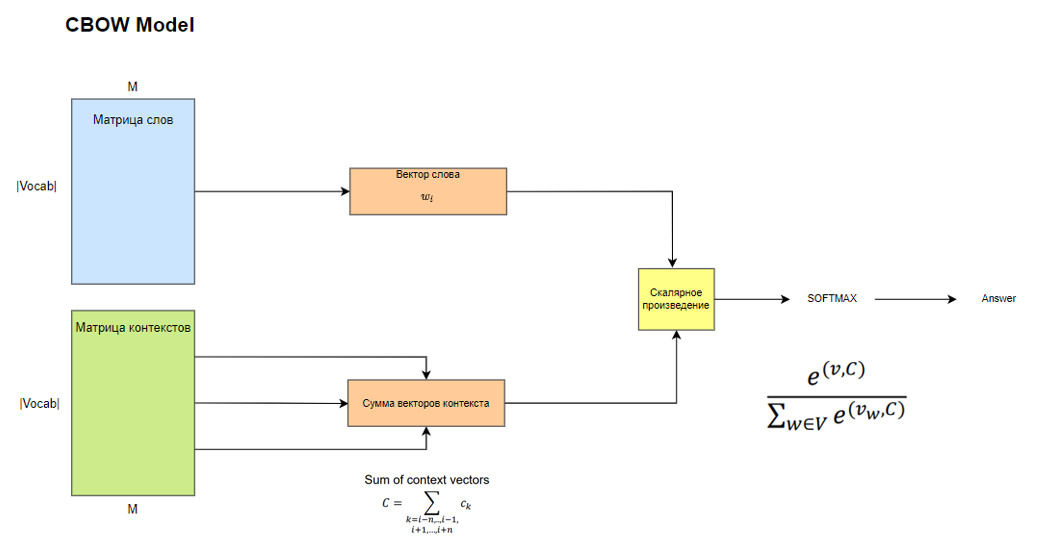

Для обеих моделей мы задаем т.н. матрицы слов и контекстов: $W_w$ и $W_c$. Обе они имеют размерность $|Vocab| \times M$, где M - выбранная нами заранее константа.

В случае модели CBOW на каждом шаге мы выбираем вектор слова из матрицы слов, отвечающий слову $w_j$, а из матрицы контекстов - сумму соответствующих векторов контекста $\vec{C}$ = $∑\vec{c_k}$, $c_i \in$ $context$ $∀ i$. Для каждого вектора слова мы можем взять скалярное произведение ($\vec{C}, \vec{w}_i$) = $\rho_i$. применим к совокупности $\rho_i$ функцию Softmax: $Softmax(\rho_i) = \frac{exp(\rho_i)}{∑\limits_{j=1..|V|}exp(\rho_j)}$

Несложно заметить следующие свойства:

1) Softmax(ρ) > 0

2) Softmax(ρ) < 1

3)$∑\limits_{j=1..|V|}Softmax(\rho_j) = 1$

Эти свойства позволяют нам воспринимать результат этой функции, как некоторое как-будто дискретное вероятностное распределение на множестве слов словаря. Параметры функции, моделирующей это скалярное произведение необходимо подобрать, исходя из условия минимизации соответствующей лосс-функции. А что, собственно, представляют из себя настраиваемые параметры приведенной модели? Этими параметрами будут ячейки матрицы контекстов и матрицы слов. Именно их мы и будем оптимизировать в целях минимизации функции потерь, пользуясь градиентными алгоритмами.

# Skip-Gram

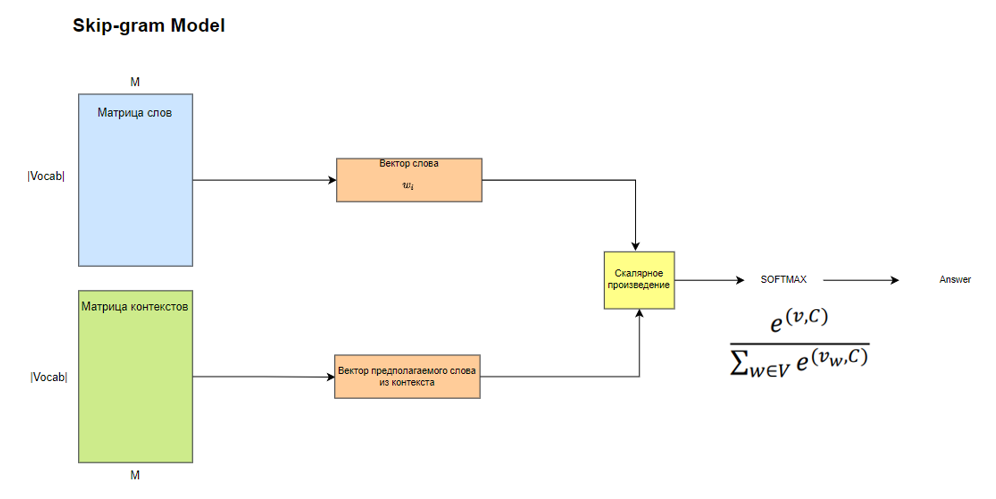

Решение задачи очень похоже на модель CBOW с единственным отличием: если ранее для каждого вектора контекстов мы получали "вероятностное" распределение по множеству слов, представленных векторами матрицы слов, то теперь для каждого центрального слова контекста мы получаем вероятностное распределение по множеству слов, представленных в матрице контекстов.

В остальном оптимизация строится точно также.

Обратим внимание на схожесть предложенной модели с моделью полносвязной нейронной сети. В случае FFNN мы получали матричное произведение XW, оптимизируя лишь одну из матриц. В данном случае мы оптимизируем обе, а в остальном модель идентична. Таким образом, предложенный механизм можно воспринимать, как некую вариацию нейронной сети.

# Замечание

Поставим вопрос о том, какую эвристическую закономерность должна в нашем представлении выучить модель.

Вспомним школьную формулу  $$(\vec{x}, \vec{y}) = ||\vec{x}||·||\vec{y}||cos[ϕ(\vec{x}, \vec{y})]$$

Согласно этой формуле, мы будем минимизировать косинус угла между векторами слов, часто встречающихся в одном и том же контексте. Таким образом, с точки зрения косинусного расстояния, векторы близких в семантическом смысле слов будут близки.

# Интересные факты о получающемся результате

Наиболее наглядный факт, демонстрирующий состоятельность предложенной идеи, состоит в устойчивой тенденции сохранения информации о семантических отношениях между словами в получившемся векторном пространстве.

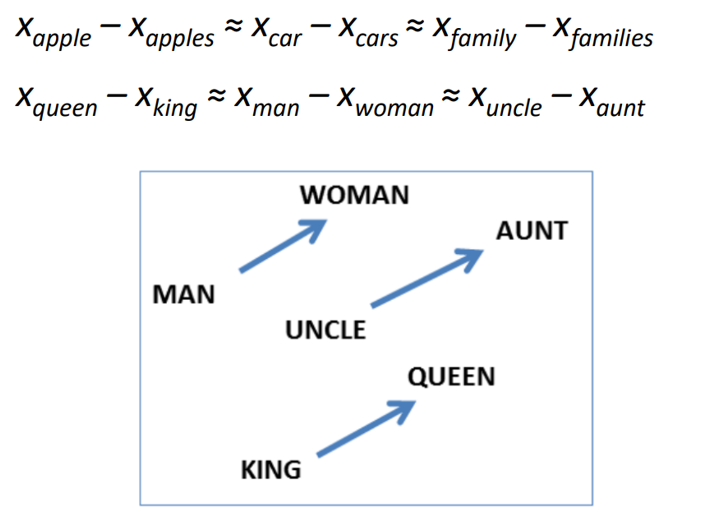

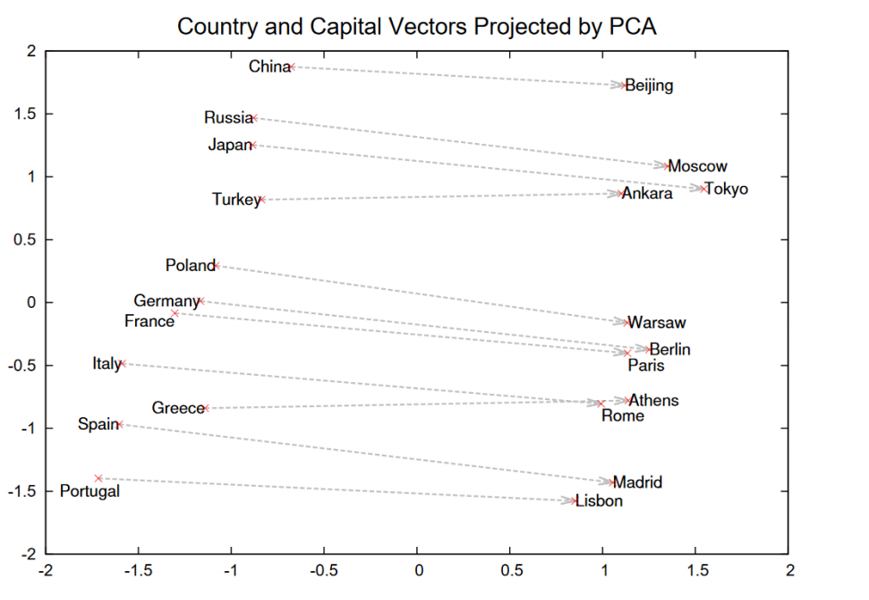

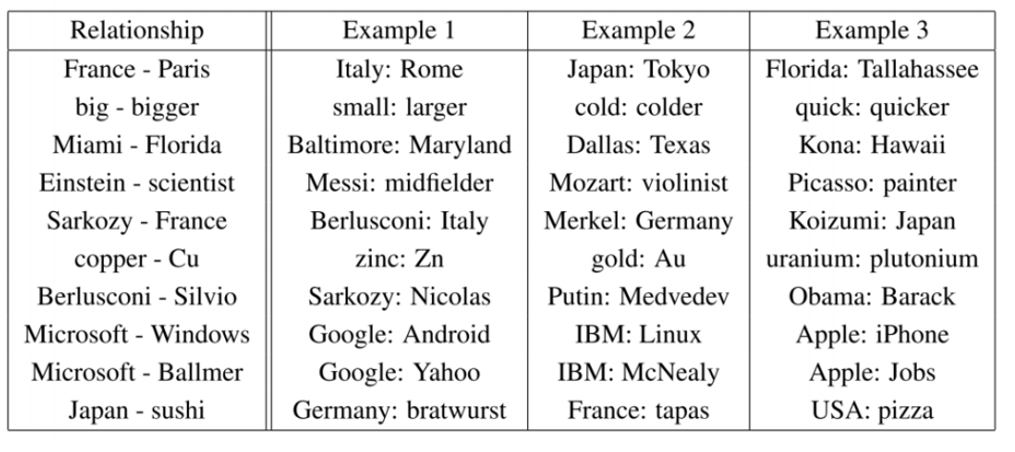

# Обучим собственную модель word2vec

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# Начнем с написания датасета

class word2vec_dataset(torch.utils.data.Dataset):
  def __init__(self, texts, word2id, context_window):
    self.words = []
    self.contexts = []
    for text in texts:
      text_ids = [word2id[w] for w in text]
      for i,word in enumerate(text):
        word_id = word2id[word]

        start = max(0, i-context_window)
        end = min(len(text), i+context_window+1)

        if i == len(text)-1:
          context = text_ids[start:]
        else:
          context = text_ids[start:i] + text_ids[i+1:end]

        self.words.append(word_id)
        self.contexts.append(context)
  def __getitem__(self, i):
      return self.words[i], self.contexts[i]

  def __len__(self):
      return len(self.words)

In [ ]:
# Также нам пригодится функция one-hot кодирования слова по его индекса
def one_hot(word_idx, vocabulary_size):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

# напишем модель Word2Vec (Skip-Gram)
class word2vec(torch.nn.Module):
  def __init__(self,emb_dim=50, vocab_size=1000):
    super().__init__()

    self.W_words = torch.nn.Parameter(torch.randn(emb_dim, vocab_size).float(), requires_grad=True)
    self.W_contx = torch.nn.Parameter(torch.randn(vocab_size, emb_dim).float(), requires_grad=True)

    self.vocab_size = vocab_size
    self.emb_dim = emb_dim

  def forward(self, word_id: int):
    #Implementation of Skip-gram model
    x = one_hot(word_id, self.vocab_size)
    word = torch.matmul(self.W_words, x)
    context_logits = torch.matmul(self.W_contx, word)
    return context_logits

def compute_loss(context_logits, pair):
  word_id, context = pair
  context = torch.tensor(context)
  log_softmax = F.log_softmax(context_logits, dim=0)
  loss_func = nn.NLLLoss(reduction='sum')
  loss = loss_func(log_softmax.repeat(len(context), 1), context)
  return loss

In [ ]:
# Подгрузим данные и предобработаем их
!pip install pymorphy2
import pymorphy2
from nltk import regexp_tokenize
import re, string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")



def tokenize_n_normalize(sent, pat=r"(?u)\b\w\w+\b", morph=pymorphy2.MorphAnalyzer()):
    return [morph.parse(tok)[0].normal_form for tok in regexp_tokenize(sent, pat)]


regex = re.compile('[%s]' % re.escape(string.punctuation))
def clear(text: str) -> str:
    text = regex.sub('', text.lower())
    text = re.sub(r'[«»\n]', ' ', text)
    text = text.replace('ё', 'е')
    return text.strip()

def preprocess(text, stopwords):
  clear_text = clear(text)
  tokenized_text = tokenize_n_normalize(clear_text)
  preproccessed_text = [w for w in tokenized_text if not w in stopwords]
  return preproccessed_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 8.2 MB 15.0 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=54a7eed5a3d3ebbaed188e3b53a44dad08cd007cf380e9bea19d4b0ffccb24ba
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import tqdm
from tqdm import tqdm

#path = "./drive/MyDrive/SummerSchool_2022/DATA/Tolstoi/"
#fp = open(path+'Tolstoi.txt','r',encoding="utf-8")
sentences = []
texts = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]
for text in tqdm(texts):
    clear_text = preprocess(text, russian_stopwords)
    sentences.append(clear_text)
    #texts.append(text)

100%|██████████| 7/7 [00:00<00:00, 4404.46it/s]


In [ ]:
from functools import reduce
as_one_text = reduce(lambda x,y: x+y, sentences)
vocabulary = set(as_one_text)

vocabulary = list(vocabulary)
word2id = {w: i for i,w in enumerate(vocabulary)}
id2word = {i: w for i,w in enumerate(vocabulary)}

len(vocabulary)

14

## Напишем цикл обучения нашей модели

In [ ]:
from tqdm.auto import tqdm as color_tqdm

def train(model, optimizer, dataset, num_epochs, log_freq=150):
  loss_val = 100000
  step=0
  for epo in tqdm(range(num_epochs), desc=f'Mean Error: {loss_val/len(dataset)}', leave=False):
      loss_val = 0
      epoch_step=0
      for pair in color_tqdm(dataset, leave=True):
          context_logits = model(pair[0])
          loss = compute_loss(context_logits, pair)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          loss_val += loss.item()
          step+=1
          epoch_step+=1

          if step % log_freq == 0:
            print(f'Step {step}. Mean error: {loss_val/epoch_step}')


In [ ]:
learning_rate = 1e-3
window_size = 2

model = word2vec(3, len(vocabulary))
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

dataset = word2vec_dataset(sentences, word2id, window_size)

In [ ]:
dataset[0]

(5, [1, 6])

In [ ]:
train(model, optimizer, dataset, 100)

Mean Error: 4166.666666666667:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:   2%|▏         | 2/100 [00:00<00:07, 13.06it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:   4%|▍         | 4/100 [00:00<00:07, 13.29it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:   6%|▌         | 6/100 [00:00<00:08, 11.63it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 150. Mean error: 7.434504906336467


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:   8%|▊         | 8/100 [00:00<00:07, 11.78it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  10%|█         | 10/100 [00:00<00:07, 11.88it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  12%|█▏        | 12/100 [00:01<00:07, 11.76it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 300. Mean error: 7.782982846101125


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  14%|█▍        | 14/100 [00:01<00:07, 11.88it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  16%|█▌        | 16/100 [00:01<00:07, 11.80it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  18%|█▊        | 18/100 [00:01<00:06, 12.09it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 450. Mean error: 7.976059701707628


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  20%|██        | 20/100 [00:01<00:06, 12.26it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  22%|██▏       | 22/100 [00:01<00:06, 12.48it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  24%|██▍       | 24/100 [00:01<00:05, 12.75it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 600. Mean error: 8.068352262179056


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  26%|██▌       | 26/100 [00:02<00:05, 12.75it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  28%|██▊       | 28/100 [00:02<00:05, 12.73it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  30%|███       | 30/100 [00:02<00:06, 11.35it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  32%|███▏      | 32/100 [00:02<00:05, 11.64it/s]

Step 750. Mean error: 6.562322934468587


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  34%|███▍      | 34/100 [00:02<00:05, 11.90it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  36%|███▌      | 36/100 [00:02<00:05, 11.65it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  38%|███▊      | 38/100 [00:03<00:05, 11.60it/s]

Step 900. Mean error: 6.904332319895427


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  40%|████      | 40/100 [00:03<00:05, 11.47it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  42%|████▏     | 42/100 [00:03<00:04, 11.72it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  44%|████▍     | 44/100 [00:03<00:04, 11.82it/s]

Step 1050. Mean error: 7.062369743982951


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  46%|████▌     | 46/100 [00:03<00:04, 11.57it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  48%|████▊     | 48/100 [00:04<00:04, 11.55it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  50%|█████     | 50/100 [00:04<00:04, 11.84it/s]

Step 1200. Mean error: 7.210891902446747


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  52%|█████▏    | 52/100 [00:04<00:03, 12.28it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  54%|█████▍    | 54/100 [00:04<00:03, 12.66it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  56%|█████▌    | 56/100 [00:04<00:03, 12.87it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 1350. Mean error: 6.09269118309021


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  58%|█████▊    | 58/100 [00:04<00:03, 12.28it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  60%|██████    | 60/100 [00:04<00:03, 12.28it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  62%|██████▏   | 62/100 [00:05<00:03, 12.27it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 1500. Mean error: 6.387551426887512


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  64%|██████▍   | 64/100 [00:05<00:02, 12.70it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  66%|██████▌   | 66/100 [00:05<00:02, 13.04it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  68%|██████▊   | 68/100 [00:05<00:02, 13.34it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 1650. Mean error: 6.523325496249729


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  70%|███████   | 70/100 [00:05<00:02, 13.32it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  72%|███████▏  | 72/100 [00:05<00:02, 13.51it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  74%|███████▍  | 74/100 [00:06<00:01, 13.65it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 1800. Mean error: 6.683485289414723


  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  76%|███████▌  | 76/100 [00:06<00:01, 13.53it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  78%|███████▊  | 78/100 [00:06<00:01, 13.43it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  80%|████████  | 80/100 [00:06<00:01, 12.09it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  82%|████████▏ | 82/100 [00:06<00:01, 11.25it/s]

Step 1950. Mean error: 5.841057141621907


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  84%|████████▍ | 84/100 [00:06<00:01, 10.86it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  86%|████████▌ | 86/100 [00:07<00:01,  9.89it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  88%|████████▊ | 88/100 [00:07<00:01, 10.08it/s]

Step 2100. Mean error: 6.070664167404175


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  90%|█████████ | 90/100 [00:07<00:00, 10.97it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  92%|█████████▏| 92/100 [00:07<00:00, 11.75it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  94%|█████████▍| 94/100 [00:07<00:00, 12.21it/s]

Step 2250. Mean error: 6.178714725706312


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  96%|█████████▌| 96/100 [00:07<00:00, 11.80it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Mean Error: 4166.666666666667:  98%|█████████▊| 98/100 [00:08<00:00, 11.89it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Step 2400. Mean error: 6.324983815352122


Можно сделать то же самое с фреймворком gensim (к примеру, вообще их очень много)

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim.models
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


model = Word2Vec(sentences=common_texts, size=100, window=5, min_count=1, workers=4)

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
model.most_similar('human')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('interface', 0.2662414610385895),
 ('response', 0.11760199815034866),
 ('eps', 0.09468033909797668),
 ('minors', 0.03298470377922058),
 ('survey', 0.012327179312705994),
 ('computer', -0.0004779547452926636),
 ('user', -0.030685070902109146),
 ('time', -0.08412666618824005),
 ('trees', -0.09021904319524765),
 ('system', -0.14515474438667297)]

Или загрузить предобученные векторы (например, отсюда http://vectors.nlpl.eu/explore/embeddings/en/models/)